In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("housing.csv")
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [2]:
desc_stats = df.describe()

# Select only numeric columns for calculating median and std_dev
numeric_df = df.select_dtypes(include=[np.number])

# Adding median and standard deviation to the descriptive statistics
desc_stats.loc['median'] = numeric_df.median()
desc_stats.loc['std_dev'] = numeric_df.std()

# Print the descriptive statistics with median and standard deviation
print(desc_stats)

            longitude      latitude  housing_median_age   total_rooms  \
count    20640.000000  20640.000000        20640.000000  20640.000000   
mean      -119.569704     35.631861           28.639486   2635.763081   
std          2.003532      2.135952           12.585558   2181.615252   
min       -124.350000     32.540000            1.000000      2.000000   
25%       -121.800000     33.930000           18.000000   1447.750000   
50%       -118.490000     34.260000           29.000000   2127.000000   
75%       -118.010000     37.710000           37.000000   3148.000000   
max       -114.310000     41.950000           52.000000  39320.000000   
median    -118.490000     34.260000           29.000000   2127.000000   
std_dev      2.003532      2.135952           12.585558   2181.615252   

         total_bedrooms    population    households  median_income  \
count      20433.000000  20640.000000  20640.000000   20640.000000   
mean         537.870553   1425.476744    499.539680     

In [3]:
import numpy as np
import pandas as pd
# Step 1: Identify columns with missing values
missing_values = df.isnull().sum()

# Filter out columns that have missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and the number of missing entries:")
print(missing_columns)

# Step 2: Impute missing values using the median
# Impute missing values only in numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Impute with median of the respective columns
for column in numeric_df.columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df.fillna({column:median_value}, inplace=True)

# Optionally: For categorical columns, you can impute missing values with the mode.
# For example:
# categorical_df = df.select_dtypes(exclude=[pd.np.number])
# for column in categorical_df.columns:
#     if df[column].isnull().sum() > 0:
#         mode_value = df[column].mode()[0]
#         df[column].fillna(mode_value, inplace=True)

# Step 3: Verify that missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after[missing_values_after > 0])

Columns with missing values and the number of missing entries:
total_bedrooms    207
dtype: int64

Missing values after imputation:
Series([], dtype: int64)


In [4]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Verify that duplicates have been removed
duplicate_rows_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removing duplicates: {duplicate_rows_after}")

# Optionally, check the number of rows before and after cleaning
print(f"Number of rows before removing duplicates: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")

Number of duplicate rows: 0
Number of duplicate rows after removing duplicates: 0
Number of rows before removing duplicates: 20640
Number of rows after removing duplicates: 20640


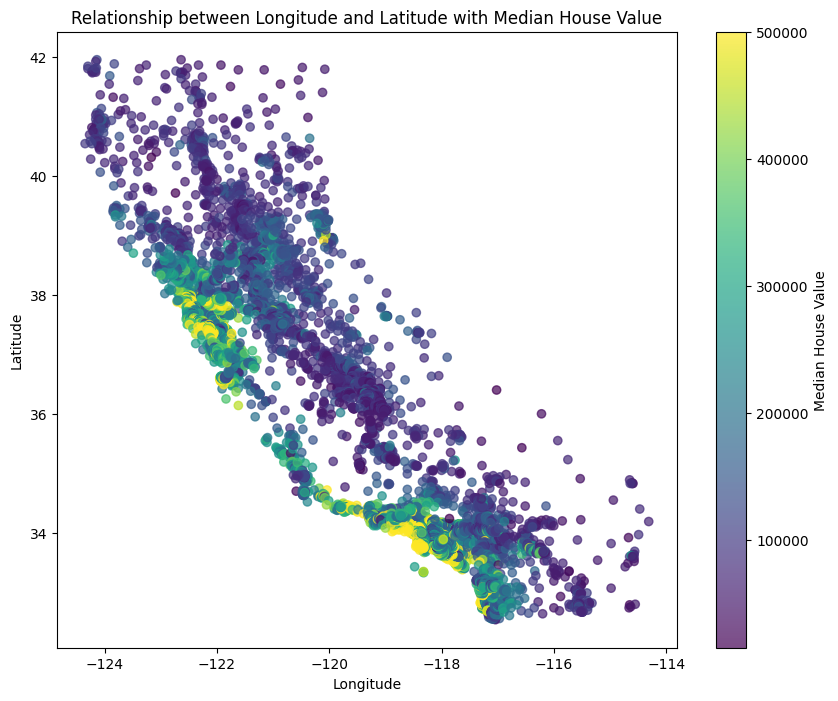

In [5]:
plt.figure(figsize=(10, 8))  # Set figure size

# Scatter plot: Longitude vs Latitude, colored by median house value
scatter = plt.scatter(df['longitude'], df['latitude'], 
                      c=df['median_house_value'], cmap='viridis', alpha=0.7)

# Adding a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between Longitude and Latitude with Median House Value')

# Show plot
plt.show()

Number of houses with total bedrooms less than 1500: 19779


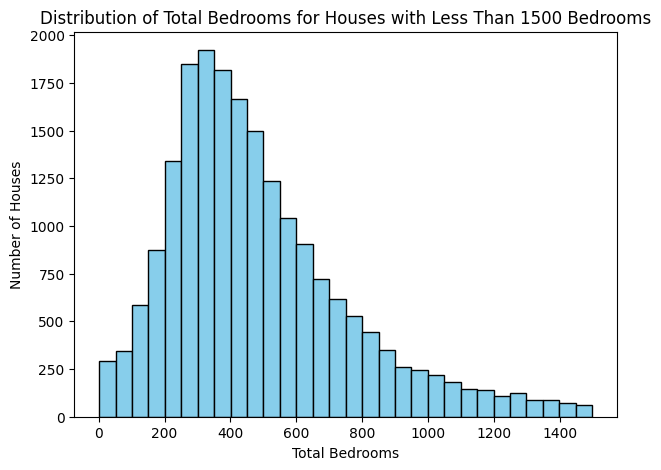

Number of houses with median income more than 10: 308


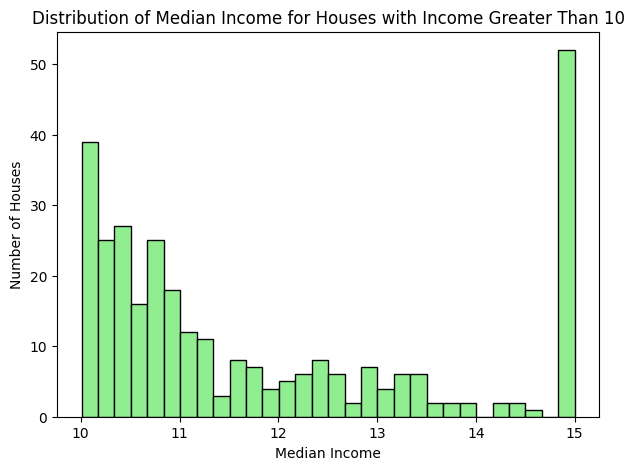

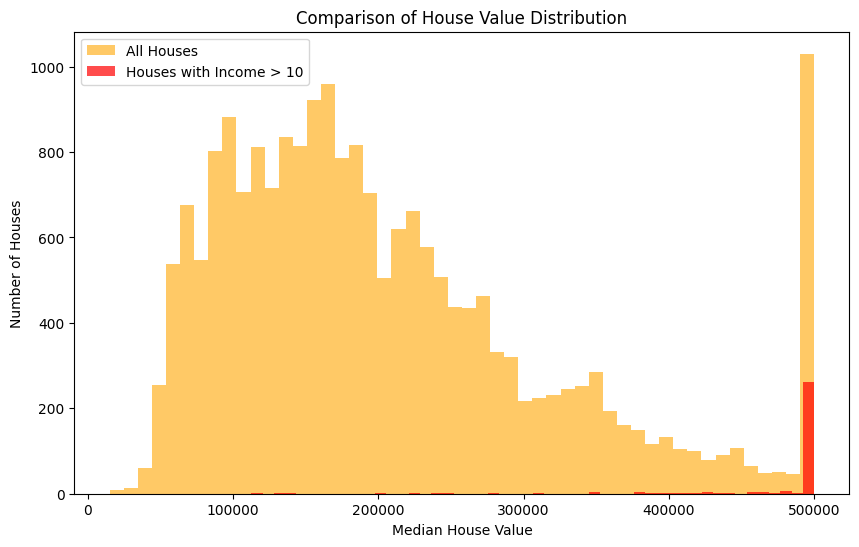

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("housing.csv")

# Observation 1: Number of houses with total bedrooms less than 1500
bedroom_condition = df[df['total_bedrooms'] < 1500]
num_houses_bedrooms = bedroom_condition.shape[0]
print(f"Number of houses with total bedrooms less than 1500: {num_houses_bedrooms}")

# Plot for Observation 1
plt.figure(figsize=(7, 5))
plt.hist(bedroom_condition['total_bedrooms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bedrooms for Houses with Less Than 1500 Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Number of Houses')
plt.show()

# Observation 2: Number of houses with median income more than 10
income_condition = df[df['median_income'] > 10]
num_houses_income = income_condition.shape[0]
print(f"Number of houses with median income more than 10: {num_houses_income}")

# Plot for Observation 2
plt.figure(figsize=(7, 5))
plt.hist(income_condition['median_income'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Median Income for Houses with Income Greater Than 10')
plt.xlabel('Median Income')
plt.ylabel('Number of Houses')
plt.show()

# Observation 3: Comparing the distribution of house values for houses with median income more than 10
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50, alpha=0.6, color='orange', label='All Houses')
plt.hist(income_condition['median_house_value'], bins=50, alpha=0.7, color='red', label='Houses with Income > 10')
plt.title('Comparison of House Value Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.legend()
plt.show()


Summary Statistics by ocean_proximity:
                  longitude                            latitude         \
                       mean   median       std count       mean median   
ocean_proximity                                                          
<1H OCEAN       -118.847766 -118.275  1.588888  9136  34.560577  34.03   
INLAND          -119.732990 -120.000  1.900950  6551  36.731829  36.97   
ISLAND          -118.354000 -118.320  0.070569     5  33.358000  33.34   
NEAR BAY        -122.260694 -122.250  0.147004  2290  37.801057  37.79   
NEAR OCEAN      -119.332555 -118.260  2.327307  2658  34.738439  33.79   

                                housing_median_age         ...  households  \
                      std count               mean median  ...         std   
ocean_proximity                                            ...               
<1H OCEAN        1.467127  9136          29.279225   30.0  ...  392.280718   
INLAND           2.116073  6551          24.271867   23.

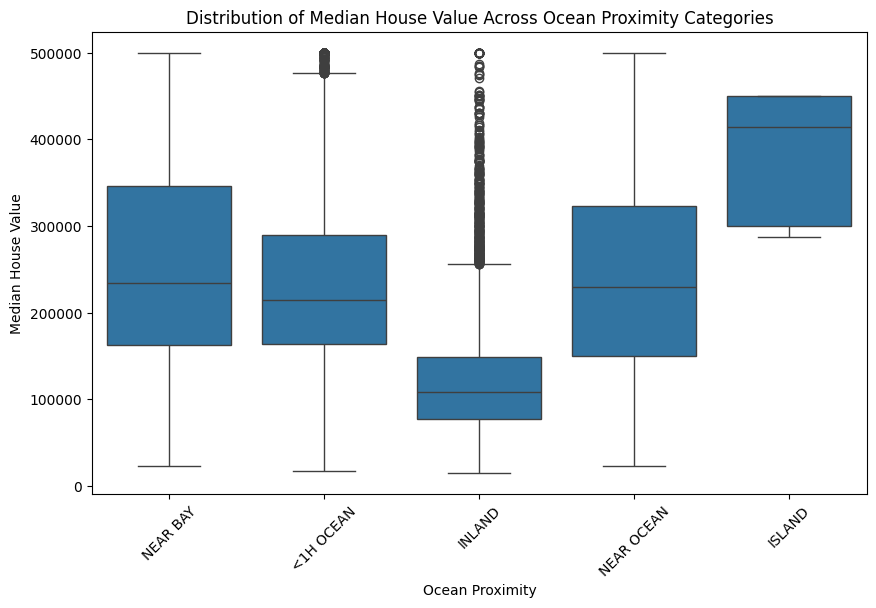


DataFrame with One-Hot Encoding of 'ocean_proximity':
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False     

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("housing.csv")

# Step 1: Grouping the data by 'ocean_proximity' and calculating summary statistics
grouped_stats = df.groupby('ocean_proximity').agg(['mean', 'median', 'std', 'count'])
print("Summary Statistics by ocean_proximity:")
print(grouped_stats)

# Step 2: Visualizing the distribution of 'median_house_value' across 'ocean_proximity' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Distribution of Median House Value Across Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

# Step 3: Encoding 'ocean_proximity' for modeling purposes
# Using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

print("\nDataFrame with One-Hot Encoding of 'ocean_proximity':")
print(df_encoded.head())

# You could also use Label Encoding if necessary:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['ocean_proximity_encoded'] = label_encoder.fit_transform(df['ocean_proximity'])
# print("\nDataFrame with Label Encoding of 'ocean_proximity':")
# print(df[['ocean_proximity', 'ocean_proximity_encoded']].head())


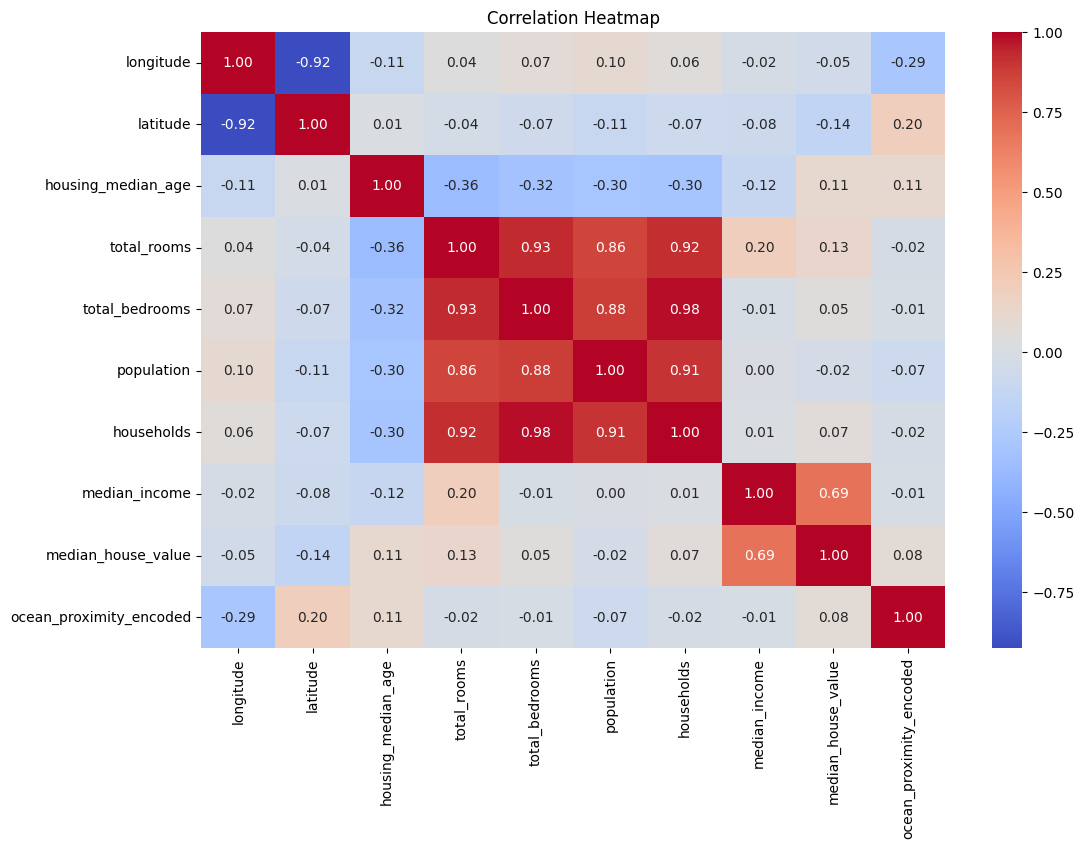

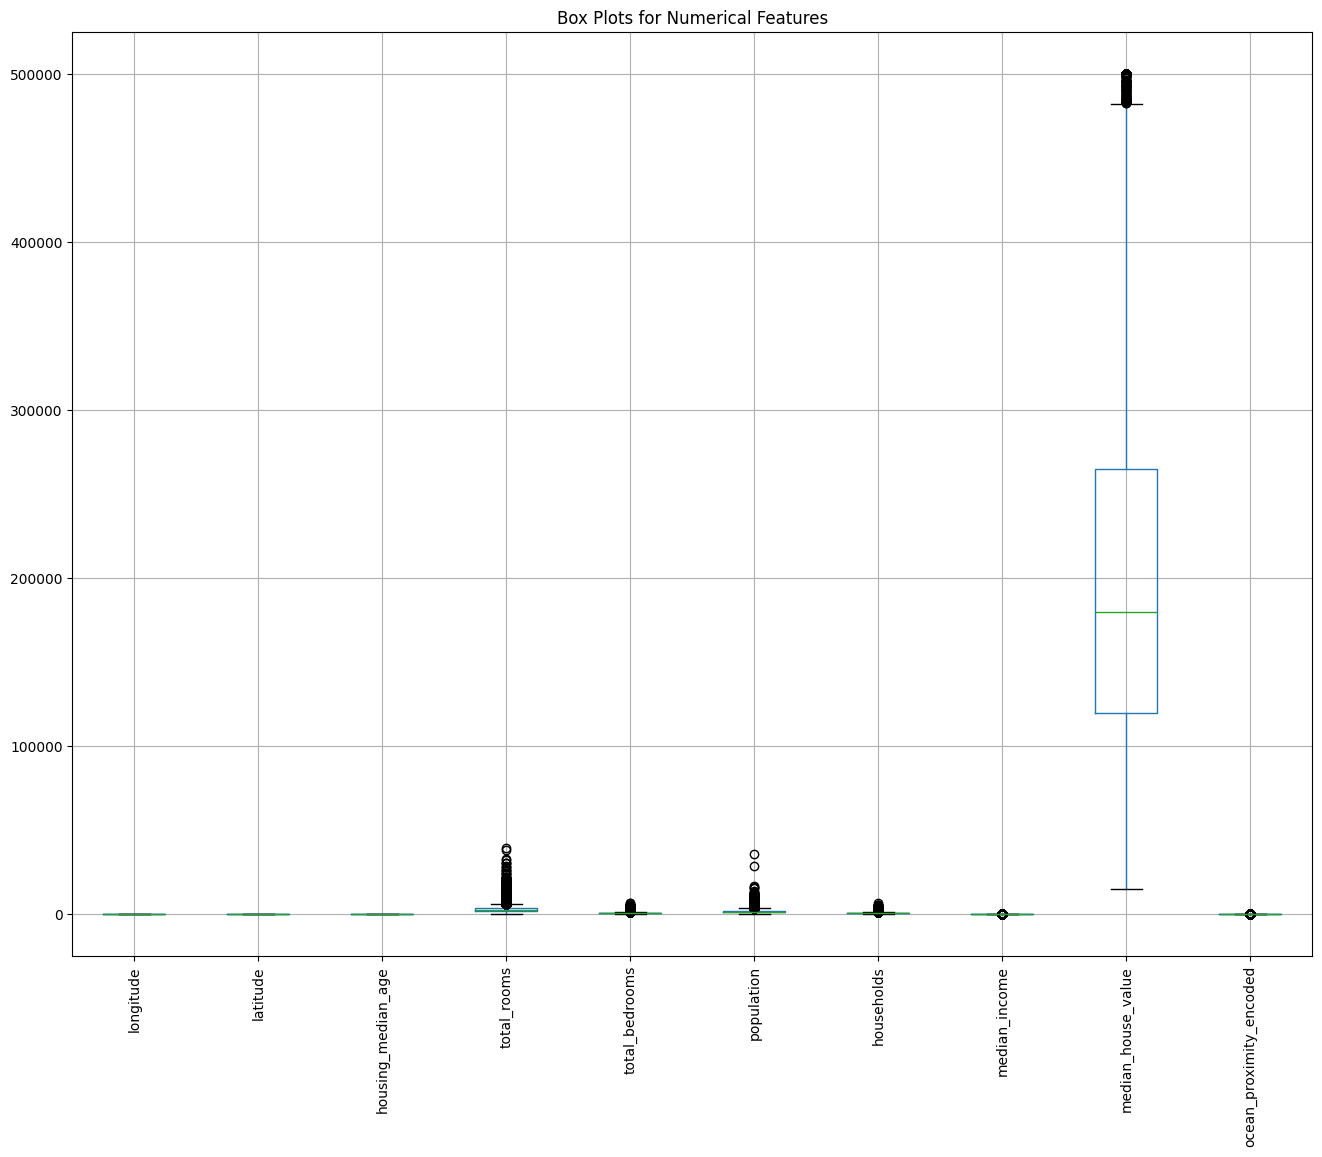

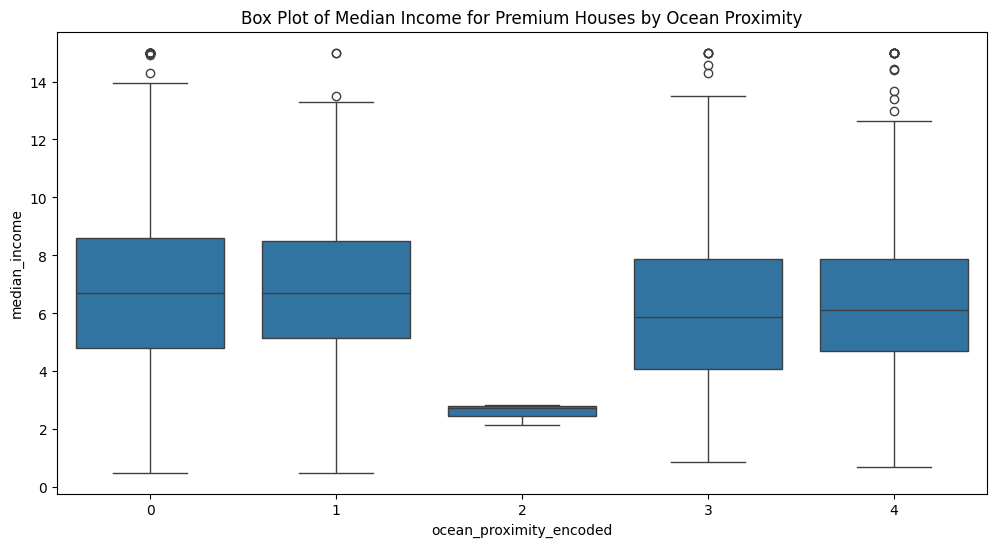

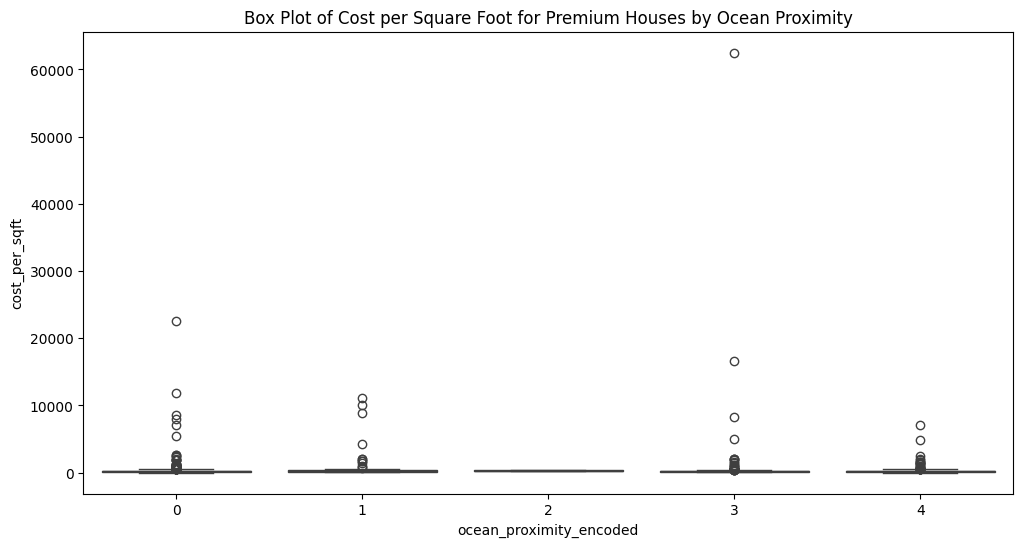

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("housing.csv")

# Encode 'ocean_proximity' into numerical values
encoder = LabelEncoder()
df['ocean_proximity_encoded'] = encoder.fit_transform(df['ocean_proximity'])

# Drop the original 'ocean_proximity' column (which is non-numeric)
df = df.drop(columns=['ocean_proximity'])

# Ensure that only numerical columns are selected
numeric_df = df.select_dtypes(include=[np.number])

# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Create box plots for all numerical features
plt.figure(figsize=(16, 12))

# Directly generate the boxplot for the entire DataFrame (no need to drop columns)
df.boxplot()

plt.xticks(rotation=90)
plt.title("Box Plots for Numerical Features")
plt.show()

# Create cost per square foot column
df['cost_per_sqft'] = df['median_house_value'] / df['total_rooms']

# Define premium houses as those with median_house_value in the top 10%
premium_threshold = df['median_house_value'].quantile(0.9)
premium_houses = df[df['median_house_value'] > premium_threshold]

# Box Plot for Median Income of Premium Houses by Ocean Proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity_encoded', y='median_income', data=premium_houses)
plt.title('Box Plot of Median Income for Premium Houses by Ocean Proximity')
plt.show()

# Box Plot for Cost per Square Foot of Premium Houses by Ocean Proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity_encoded', y='cost_per_sqft', data=premium_houses)
plt.title('Box Plot of Cost per Square Foot for Premium Houses by Ocean Proximity')
plt.show()



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_column_distribution(df, column):
    """
    Visualizes the distribution and relationship of a specified numerical column in a dataset.

    Parameters:
    - df: Pandas DataFrame containing the dataset
    - column: The name of the numerical column to visualize

    The function creates a figure with three subplots:
    1. KDE plot of the column
    2. Boxplot of the column
    3. Scatterplot of the column against 'median_house_value'
    """

    # Set up the figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # KDE plot
    sns.kdeplot(df[column], ax=axes[0], shade=True, color='blue')
    axes[0].set_title(f'KDE of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')
    
    # Boxplot
    sns.boxplot(df[column], ax=axes[1], color='orange')
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)
    
    # Scatterplot of the column vs. median_house_value
    sns.scatterplot(x=df[column], y=df['median_house_value'], ax=axes[2], color='green')
    axes[2].set_title(f'Scatterplot of {column} vs. Median House Value')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Median House Value')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
# df = pd.read_csv('housing.csv')  # Assuming the dataset is loaded
# visualize_column_distribution(df, 'median_income')


Mean: 100.17743594125257
Standard Deviation: 19.75632526518286
Lower Bound: 60.66478541088685
Upper Bound: 139.6900864716183
Total number of outliers: 47


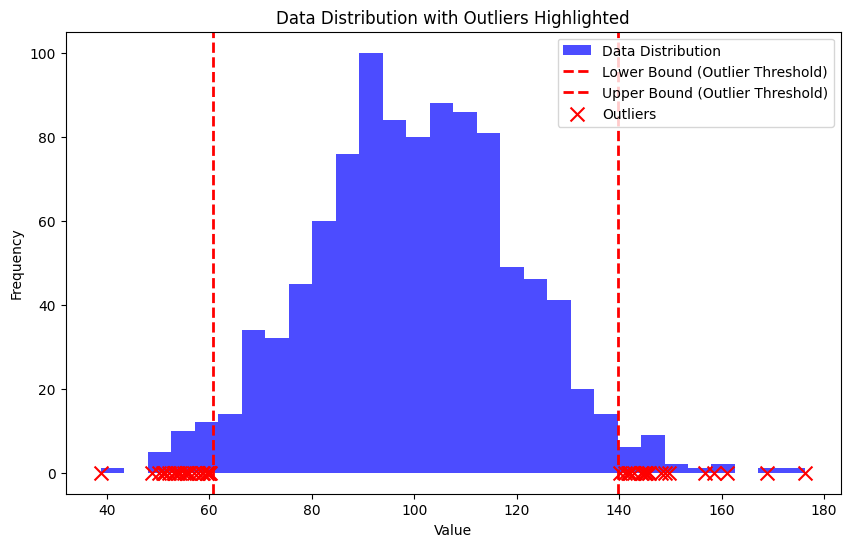

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset creation for illustration (replace with your actual dataset)
# Replace 'column_name' with the actual column you want to analyze.
data = {'column_name': np.random.normal(loc=100, scale=20, size=1000)}
df = pd.DataFrame(data)

# Calculate mean and standard deviation
mean = df['column_name'].mean()
std_dev = df['column_name'].std()

# Define the upper and lower bounds (95% of data lies within 2 standard deviations)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Identify outliers
outliers = df[(df['column_name'] < lower_bound) | (df['column_name'] > upper_bound)]

# Calculate the total number of outliers
num_outliers = len(outliers)

# Print summary
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Total number of outliers: {num_outliers}")

# Visualize the data distribution and outliers
plt.figure(figsize=(10, 6))

# Plot histogram for the data distribution
plt.hist(df['column_name'], bins=30, alpha=0.7, color='blue', label='Data Distribution')

# Plot vertical lines for lower and upper bounds
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label='Lower Bound (Outlier Threshold)')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label='Upper Bound (Outlier Threshold)')

# Highlight the outliers in a scatter plot
plt.scatter(outliers['column_name'], np.zeros_like(outliers['column_name']) - 0.02, 
            color='red', marker='x', s=100, label='Outliers')

plt.title('Data Distribution with Outliers Highlighted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample dataset creation for illustration (replace with your actual dataset)
# Assume df contains the numerical features you want to scale.
data = {
    'feature1': np.random.normal(loc=100, scale=20, size=100),
    'feature2': np.random.normal(loc=200, scale=30, size=100),
    'feature3': np.random.normal(loc=50, scale=10, size=100)
}
df = pd.DataFrame(data)

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler
standard_scaled = standard_scaler.fit_transform(df)

# Apply MinMaxScaler
minmax_scaled = minmax_scaler.fit_transform(df)

# Convert scaled data back to DataFrames for easier comparison
standard_scaled_df = pd.DataFrame(standard_scaled, columns=df.columns)
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=df.columns)

# Compare ranges of the scaled data
print("Original Data Range:")
print(df.describe())

print("\nStandardScaler Data Range:")
print(standard_scaled_df.describe())

print("\nMinMaxScaler Data Range:")
print(minmax_scaled_df.describe())

from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer

# Initialize the additional scalers
robust_scaler = RobustScaler()
n_samples = len(df)
quantile_scaler = QuantileTransformer(n_quantiles=min(1000, n_samples))

power_transformer = PowerTransformer()

# Apply RobustScaler
robust_scaled = robust_scaler.fit_transform(df)

# Apply QuantileTransformer
quantile_scaled = quantile_scaler.fit_transform(df)

# Apply PowerTransformer
power_scaled = power_transformer.fit_transform(df)

# Convert to DataFrames for easier comparison
robust_scaled_df = pd.DataFrame(robust_scaled, columns=df.columns)
quantile_scaled_df = pd.DataFrame(quantile_scaled, columns=df.columns)
power_scaled_df = pd.DataFrame(power_scaled, columns=df.columns)

# Display the scaled data statistics
print("\nRobustScaler Data Range:")
print(robust_scaled_df.describe())

print("\nQuantileTransformer Data Range (Gaussian-like):")
print(quantile_scaled_df.describe())

print("\nPowerTransformer Data Range:")
print(power_scaled_df.describe())



Original Data Range:
         feature1    feature2    feature3
count  100.000000  100.000000  100.000000
mean    99.616199  196.848441   50.014981
std     21.365574   30.822228    9.068005
min     55.971651  112.110776   27.612858
25%     85.736298  179.954578   43.986295
50%     98.965410  193.686115   50.645171
75%    115.931309  216.905566   56.780819
max    149.680911  284.216915   69.454489

StandardScaler Data Range:
           feature1      feature2      feature3
count  1.000000e+02  1.000000e+02  1.000000e+02
mean  -2.753353e-16 -4.785061e-16  1.798561e-16
std    1.005038e+00  1.005038e+00  1.005038e+00
min   -2.053042e+00 -2.763089e+00 -2.482903e+00
25%   -6.529113e-01 -5.508678e-01 -6.681798e-01
50%   -3.061317e-02 -1.031158e-01  6.984613e-02
75%    7.674637e-01  6.540140e-01  7.498809e-01
max    2.355047e+00  2.848873e+00  2.154547e+00

MinMaxScaler Data Range:
         feature1    feature2    feature3
count  100.000000  100.000000  100.000000
mean     0.465744    0.492357  